# COVID-19 Data Analysis

In [1]:
import numpy as num
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 1) Business Understanding

[Shravan MEDIUM BLOG URL COVID-19](https://medium.com/@shravank/covid-19-impact-on-the-usa-b51213ad4ff7)

This code helps in analysis current Corona situation in USA like reasons for Spread, Death Rates and Predicts Future Hotspots.

Can we get answers for following question from data ?

1. What are the parameters for the spread of COVID-19?
2. What are the most death rate states in the USA and why?
3. Which states are going to be next hotspots in the USA?

## 2) Data Understanding

In [2]:
def dataload(path,index_column):
    """Helps to load the from csv and return dataframe.
    Keyword arguments:
    path -- path of the file
    imag -- index column name
    """
    df = pd.read_csv(path,index_col=index_column)
    return df

#### Gather data

In [3]:
covid_df = dataload('./covid19_usa.csv','State')
sensus_df = dataload('./population_state_usa.csv','State')

In [4]:
#Merging two datasets
df = covid_df.join(sensus_df)

In [5]:
df.head()

,Total Cases,New Cases,Total Deaths,New Deaths,Active Cases,rank,Population,MedianAge,MedianAgeMale,MedianAgeFemale
State,,,,,,,,,,
New York,"60,679","7,286","1,063",180.0,"56,044",21.0,19618453.0,38.7,37.1,40.2
New Jersey,"13,386","2,262",161,21.0,"13,225",11.0,8881845.0,39.8,38.2,41.4
California,"6,204",655,131,12.0,"6,052",45.0,39148760.0,36.3,35.2,37.5
Michigan,"5,486",836,132,21.0,"5,349",12.0,9957488.0,39.7,38.2,41.0
Massachusetts,"4,955",698,48,4.0,"4,906",13.0,6830193.0,39.4,37.9,40.9


#### Access

In [6]:
num_rows = df.shape[0] # number of rows is equivalent to number of players 
num_columns = df.shape[1]
print('There are {} states and {} attributes'.format(num_rows,num_columns))

There are 58 states and 10 attributes


In [7]:
# attributes for each player entry
df.columns

Index(['Total Cases', 'New Cases', 'Total Deaths', 'New Deaths',
       'Active Cases', 'rank', 'Population', 'MedianAge', 'MedianAgeMale',
       'MedianAgeFemale'],
      dtype='object')

#### Missing values in each column

In [8]:
df.describe()

,New Deaths,rank,Population,MedianAge,MedianAgeMale,MedianAgeFemale
count,40.000000,50.000000,5.000000e+01,50.000000,50.000000,50.000000
mean,18.150000,25.520000,6.444371e+06,38.324000,37.062000,39.608000
std,62.635924,14.612324,7.259747e+06,2.383922,2.195068,2.546293
min,1.000000,1.000000,5.818360e+05,30.700000,30.100000,31.300000
25%,1.000000,13.250000,1.847980e+06,36.900000,35.725000,38.050000
50%,3.000000,25.500000,4.551910e+06,38.300000,37.050000,39.650000
75%,5.500000,37.750000,7.207423e+06,39.375000,38.175000,40.875000
max,363.000000,51.000000,3.914876e+07,44.600000,43.200000,45.800000


## 3) Data Preparation

#### Clean

Here we are going to clean our dataset. We are going to: 

1)Drop any unwanted column

2)Replace special characters

3)Convert object data type to numerical values 

4)Handle missing values

In [9]:
# Drop unused columns
drop_columns = ['rank']
df.drop(drop_columns, axis = 1, inplace = True)
df.head(10)

,Total Cases,New Cases,Total Deaths,New Deaths,Active Cases,Population,MedianAge,MedianAgeMale,MedianAgeFemale
State,,,,,,,,,
New York,"60,679","7,286","1,063",180.0,"56,044",19618453.0,38.7,37.1,40.2
New Jersey,"13,386","2,262",161,21.0,"13,225",8881845.0,39.8,38.2,41.4
California,"6,204",655,131,12.0,"6,052",39148760.0,36.3,35.2,37.5
Michigan,"5,486",836,132,21.0,"5,349",9957488.0,39.7,38.2,41.0
Massachusetts,"4,955",698,48,4.0,"4,906",6830193.0,39.4,37.9,40.9
Florida,"4,950",912,60,4.0,"4,890",20598139.0,41.9,40.3,43.5
Washington,"4,896",586,200,11.0,"4,276",7294336.0,37.6,36.6,38.7
Illinois,"4,596","1,105",65,18.0,"4,529",12821497.0,37.9,36.6,39.2
Louisiana,"3,540",225,151,14.0,"3,389",4663616.0,36.6,35.4,37.9


In [10]:
#Replace special characters
df = df.replace({',':''},regex=True)

In [11]:
#Finding missing values
print(df.isnull().sum())

Total Cases         0
New Cases           3
Total Deaths        6
New Deaths         18
Active Cases        0
Population          8
MedianAge           8
MedianAgeMale       8
MedianAgeFemale     8
dtype: int64


In [12]:
# convert object data type to numerical values 
df = df.apply(pd.to_numeric,errors='coerce')

In [13]:
# handle missing values
df.fillna(0,inplace=True)
df.drop(df.tail(7).index,inplace=True)

In [14]:
df.head()

,Total Cases,New Cases,Total Deaths,New Deaths,Active Cases,Population,MedianAge,MedianAgeMale,MedianAgeFemale
State,,,,,,,,,
New York,60679,7286.0,1063.0,180.0,56044,19618453.0,38.7,37.1,40.2
New Jersey,13386,2262.0,161.0,21.0,13225,8881845.0,39.8,38.2,41.4
California,6204,655.0,131.0,12.0,6052,39148760.0,36.3,35.2,37.5
Michigan,5486,836.0,132.0,21.0,5349,9957488.0,39.7,38.2,41.0
Massachusetts,4955,698.0,48.0,4.0,4906,6830193.0,39.4,37.9,40.9


## 4) Answer Questions

### Analyse

##### Q1): What are the parameters for the spread of COVID-19?

In [15]:
# add two columns to define rank based on Population & MedianAge

df['PopulationRank'] = df['Population'].rank(ascending=False).astype(int)
df['MedianAgeRank'] = df['MedianAge'].rank(ascending=False).astype(int)

spread = df[['Total Cases','PopulationRank','Population']].sort_values(by=['Total Cases'],ascending=False)

### Visualize

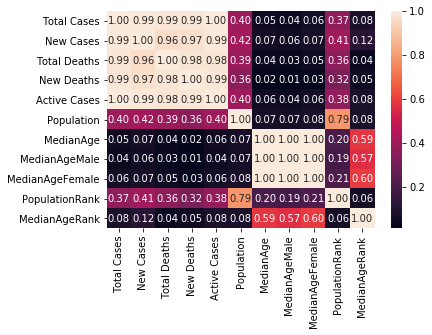

In [16]:
sns.heatmap(df.corr().abs(), annot=True, fmt=".2f");

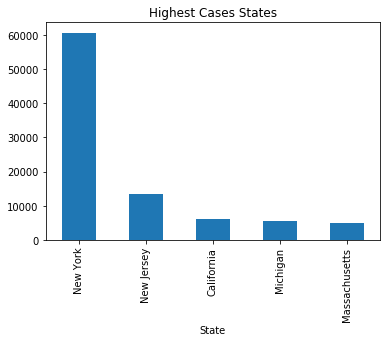

In [17]:
spread['Total Cases'].head().plot(kind='bar')
plt.title('Highest Cases States');

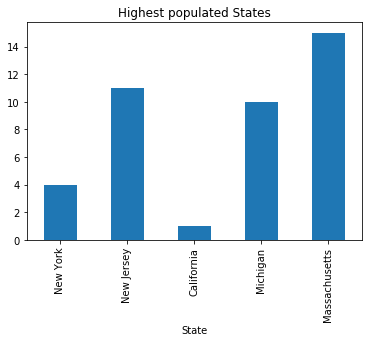

In [18]:
spread['PopulationRank'].head().plot(kind='bar')
plt.title('Highest populated States');

##### After merging COVID-19 cases and statewide demographics results shows the population is directly proportioned to total cases. Considered 15 most reported cases states and ranked all the states based on Total Population.

##### California, Texas, Florida, New York, and Illinois have the highest population in the order mentioned.

##### The virus is spreading exponentially in states where there is more population. So the population will be one of the key factors for cases.

##### As per the heatmap, the population has the highest degree of correlation with the spread(Total Cases).






#### Q2) What are the most death rate states in the USA and why?


#### Analyse

In [19]:
#Calculate death rata
df['DeathRate'] = (df['Total Deaths']/df['Total Cases'])*100

In [20]:
deathrate = df.sort_values(by=['DeathRate'],ascending=False)
deathrate[['DeathRate','MedianAge']].head(10)

,DeathRate,MedianAge
State,,
Vermont,5.106383,42.9
Louisiana,4.265537,36.6
Washington,4.084967,37.6
Oklahoma,3.729604,36.4
Georgia,3.093552,36.5
Delaware,2.586207,40.2
Virginia,2.471910,38.1
Michigan,2.406125,39.7
Oregon,2.372263,39.2


#### Visualize

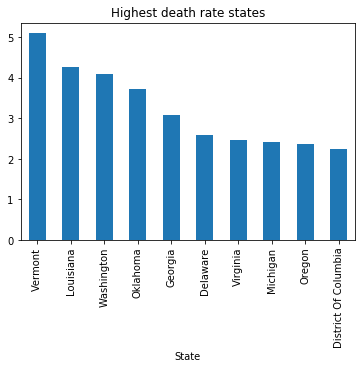

In [21]:
deathrate['DeathRate'][:10].plot(kind='bar');
plt.title('Highest death rate states');

##### Here I have tried to correlate the Median Age with death rate(% of Total Deaths/Total Cases). Surprisingly Higher Median Age states have the highest death rate.

### Q3).Which states are going to be next hotspots in the USA?

#### analyze

In [22]:
spots = df.sort_values(by=['PopulationRank','MedianAge'])
spots[['Total Cases','Total Deaths','DeathRate','PopulationRank','MedianAge']].head(10)

,Total Cases,Total Deaths,DeathRate,PopulationRank,MedianAge
State,,,,,
California,6204,131.0,2.111541,1,36.3
Texas,2808,38.0,1.353276,2,34.4
Florida,4950,60.0,1.212121,3,41.9
New York,60679,1063.0,1.751842,4,38.7
Illinois,4596,65.0,1.414273,5,37.9
Pennsylvania,3419,41.0,1.199181,6,40.7
Ohio,1653,29.0,1.754386,7,39.3
Georgia,2683,83.0,3.093552,8,36.5
North Carolina,1167,7.0,0.599829,9,38.6


#### visualize

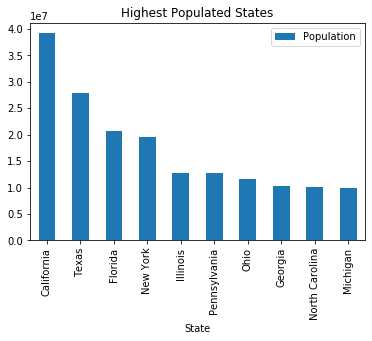

In [23]:
spots[['Population']][:10].plot(kind='bar');
plt.title('Highest Populated States');

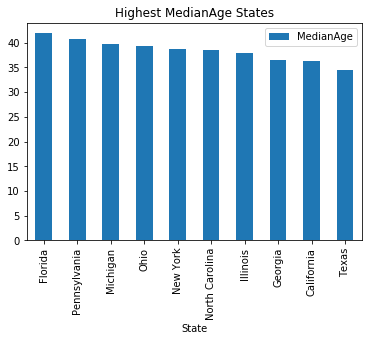

In [24]:

spots[['MedianAge']][:10].sort_values(by=['MedianAge'], ascending=False).plot(kind='bar');
plt.title('Highest MedianAge States');

##### If we consider Population and MedianAge as factors for spread and death rate, the following states will be hotspots for COVID-19.


##### Though California and Texas have the highest population, Florida and Pennsylvania can be more impacted because of the highest Median Age factor.

## 6) Conclusion

#### In current situations, the US government is concentrating on testing and treating patients. Parallelly they should work to stop the spreadings.


##### Especially aged and people under severe medical conditions need to be more precautious as the survival rate for them will be very minimal.